## Lab: Cart Pole using OpenAI gym  
## Basics and Simple Policy

### University of Virginia
### Reinforcement Learning
#### Last updated: August 21, 2023

---


### Agent and Environment

It is essential for the agent to have a way to get the next state and reward from the environment. 

Sometimes it is possible for the agent to interact with environment in real life, but often this is expensive / dangerous / impossible.

We use models and simulators in this latter case.

For this reason, the Gym package is useful in RL

---

### Introduction to Gym

We will work with [Gym](https://gym.openai.com/) from Open AI.

Gym is a toolkit for developing and comparing RL algorithms.

It comes with many pre-built environments.

Users can build their own custom environments. See [here](https://towardsdatascience.com/creating-a-custom-openai-gym-environment-for-stock-trading-be532be3910e#:~:text=8%20min%20read-,Create%20custom%20gym%20environments%20from%20scratch%20%E2%80%94%20A%20stock%20market%20example,Atari%20games%20to%20experiment%20with.) for example.

---

### Cart Pole Problem

The [**CartPole**](https://gym.openai.com/videos/2019-10-21--mqt8Qj1mwo/CartPole-v1/original.mp4) problem has a small state space and action space, so it's popular for illustrating ideas. 

Pole is attached to a cart on a frictionless track.

Pole starts upright

**Goal** is to keep pole from falling over

Control system by applying **force** -1 or +1 to cart.

**Reward** of +1 for each timestep the pole remains upright

**Episode** ends when pole is more than 12 degrees from vertical, or cart moves more than 2.4 units from center

CartPole-v0 defines *solving* as getting average reward of 195.0 over 100 consecutive trials.

<img src="./cartpole.png" alt="drawing" width="150"/>

---

### Setup and First Steps

This notebook can be easily run on [Google Colab](https://colab.research.google.com/)

In [1]:
import gym

Load the environment

In [7]:
env = gym.make("CartPole-v1")

state = env.reset(seed=314)

Given the state, we take an action. The next state comes from the environment, which is encoded in `gym`.

Components:   
[0]: cart horizontal position (0.0 = center)  
[1]: velocity (positive means right)  
[2]: angle of the pole (0.0 = vertical)  
[3]: pole's angular velocity (positive means clockwise)

In [9]:
state

array([0.04225422, 0.02126478, 0.02520455, 0.00700802], dtype=float32)

In [10]:
# state space number of components
env.observation_space.shape[0]

4

The action space consists of two options: 

[0]: move cart left   
[1]: move cart right

In [11]:
env.action_space

Discrete(2)

Let's take an action, draw a sample and look at the results.

In [14]:
# move right
action = 1

# take a step and get next state, reward from environment
state, reward, done, info = env.step(action)

print('state', state)
print('reward', reward)
print('done', done)
print('info', info)

state [ 0.05521519  0.60560644  0.00854836 -0.84858215]
reward 1.0
done False
info {}


**Reward and Episode**  

For each time step that the cart keeps the pole balanced, it earns reward 1.

If the pole tilts too much or if the cart moves off screen, `reward=0` and `done=True` (the episode will end).

When the episode ends, a new episode may begin. The process learns cumulatively from each episode.

**Simple policy**:  

When the pole leans left (negative angle), move left. When the pole leans right (positive angle), move right.

Run many episodes and visualize their reward distribution.

In [15]:
def simple_policy(obs):
    angle = obs[2]
    return 0 if angle < 0 else 1

num_episodes = 1000
num_steps = 100
rewards = []

for episode in range(num_episodes):
    ep_reward = 0
    obs = env.reset()
    for step in range(num_steps):
        action = simple_policy(obs)
        obs, reward, done, info = env.step(action)
        ep_reward += reward
        if done:
            break

    rewards.append(ep_reward)

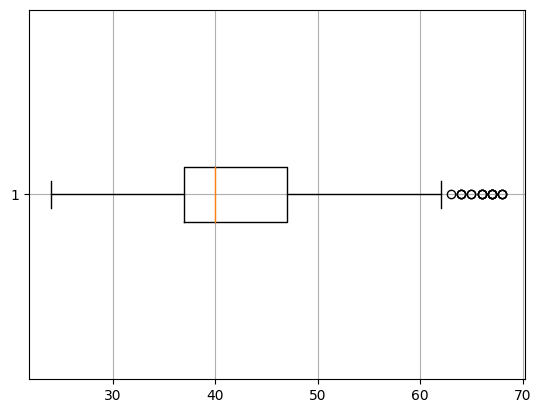

In [16]:
import matplotlib.pyplot as plt

plt.boxplot(rewards, vert=False)
plt.grid()
plt.show()

---

**Question 1** Given this setup and simple policy what is the mean and maximum reward (roughly)?

**Question 2: Modified Policy.** Consider moving the cart for one step (either left or right), then reversing direction for one step, and then following the simple policy. Does  this change in policy increase the mean reward?

**Question 3** What is the mean reward if you reverse the simple policy, moving left when the pole leans right, and moving right when the pole leans left? This is not a good idea, but it's instructive.

**Question 4** Are there other simple changes you can make to increase the mean reward?

---  

### Wrapup

This demo illustrated some basic ideas of reinforcement learning and got you started with OpenAI Gym. 

The simple policy is not able to solve the Cart Pole problem. 

We will revisit this example later, bringing in more tools for a better solution.

---
